In [103]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [104]:
# Загрузка и анализ набора данных
row_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
row_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [105]:
# Размер набора данных
print(row_dataset.shape)

(209, 10)


In [106]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

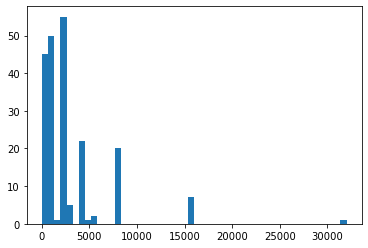

In [107]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = row_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

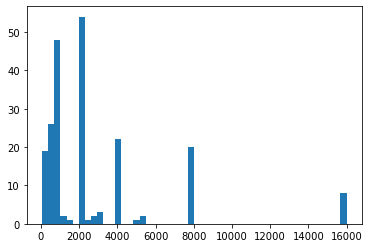

In [108]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

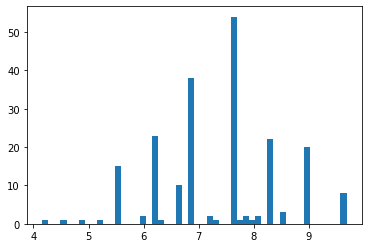

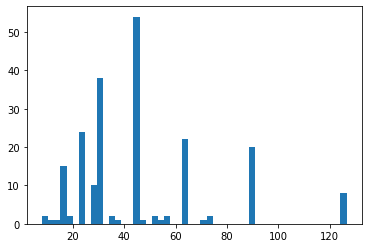

In [109]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [110]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [111]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [112]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

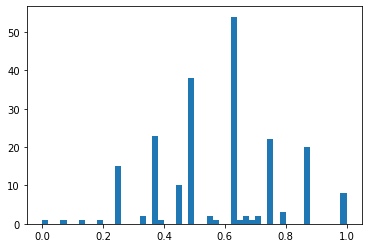

In [113]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

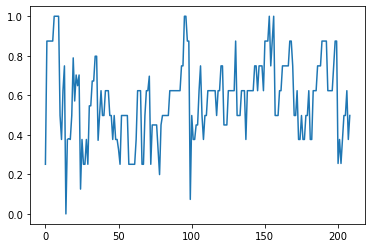

In [114]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [115]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [116]:
# Конвертируем в одномерный массив
data = data.flatten()

In [117]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

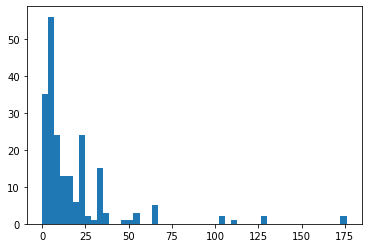

In [118]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = row_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

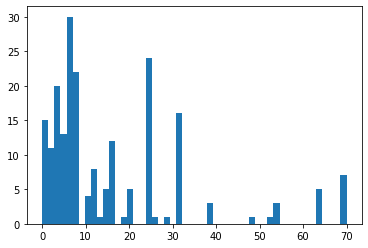

In [119]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

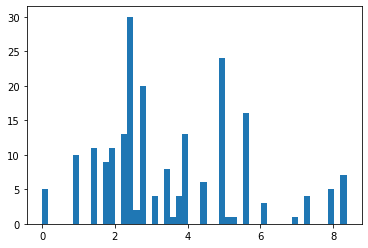

In [120]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [121]:
data = data ** 0.5

In [122]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [123]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

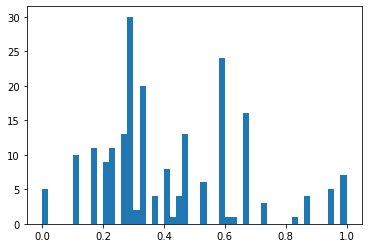

In [124]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

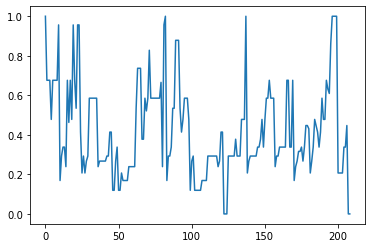

In [125]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [126]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [127]:
# Конвертируем в одномерный массив
data = data.flatten()

In [128]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

In [129]:
print(dataset)

         MMIN     CHMAX
0    0.251074  1.000000
1    0.874463  0.676123
2    0.874463  0.676123
3    0.874463  0.676123
4    0.874463  0.478091
..        ...       ...
204  0.497852  0.338062
205  0.497852  0.338062
206  0.623389  0.447214
207  0.376611  0.000000
208  0.497852  0.000000

[209 rows x 2 columns]


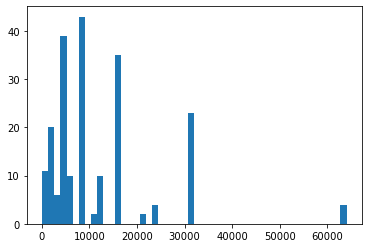

In [130]:
# Обработка данных в столбце №4

# Загружаем данные
data = row_dataset[4]

# Анализируем распределение
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()


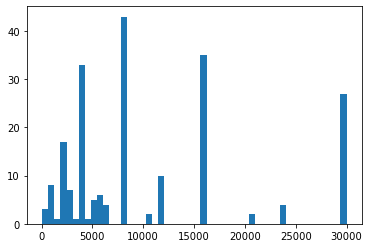

In [131]:
data = numpy.clip(data,0,30000)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

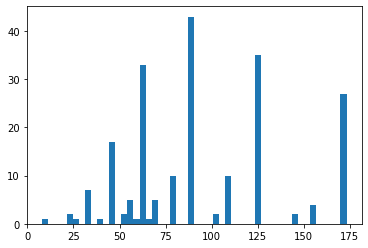

In [132]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()
data = data ** 0.5

In [133]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)

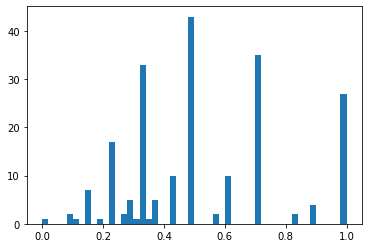

In [134]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()
data = data.flatten()
dataset['MMAX'] = data

In [135]:
print(dataset)

         MMIN     CHMAX      MMAX
0    0.251074  1.000000  0.420445
1    0.874463  0.676123  1.000000
2    0.874463  0.676123  1.000000
3    0.874463  0.676123  1.000000
4    0.874463  0.478091  0.717236
..        ...       ...       ...
204  0.497852  0.338062  0.492980
205  0.497852  0.338062  0.492980
206  0.623389  0.447214  0.492980
207  0.376611  0.000000  0.492980
208  0.497852  0.000000  0.334406

[209 rows x 3 columns]


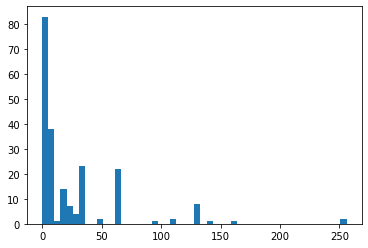

In [136]:
#Обработка столбца №5

data = row_dataset[5]
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

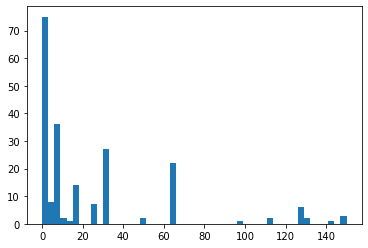

In [137]:
data = numpy.clip(data, 0, 150)
matplotlib.pyplot.hist(data, bins=50)
matplotlib.pyplot.show()

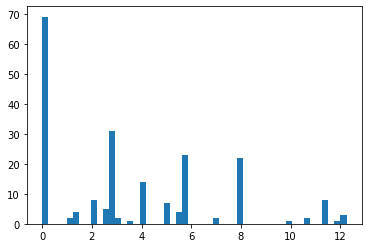

In [138]:

matplotlib.pyplot.hist(data**0.5, bins=50)
matplotlib.pyplot.show()
data = data**0.5

In [139]:
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['CACH'] = data

In [140]:
print(dataset)

         MMIN     CHMAX      MMAX     CACH
0    0.251074  1.000000  0.420445  1.00000
1    0.874463  0.676123  1.000000  0.46188
2    0.874463  0.676123  1.000000  0.46188
3    0.874463  0.676123  1.000000  0.46188
4    0.874463  0.478091  0.717236  0.46188
..        ...       ...       ...      ...
204  0.497852  0.338062  0.492980  0.00000
205  0.497852  0.338062  0.492980  0.46188
206  0.623389  0.447214  0.492980  0.00000
207  0.376611  0.000000  0.492980  0.46188
208  0.497852  0.000000  0.334406  0.00000

[209 rows x 4 columns]


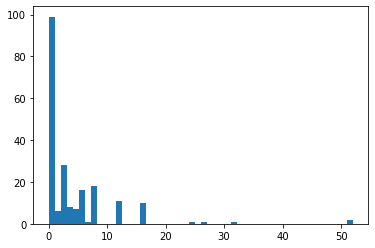

In [141]:
#Анализ столбца №6
data = row_dataset[6]

# Анализируем распределение
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

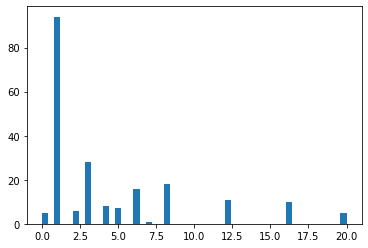

In [142]:
data = numpy.clip(data, 0, 20)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

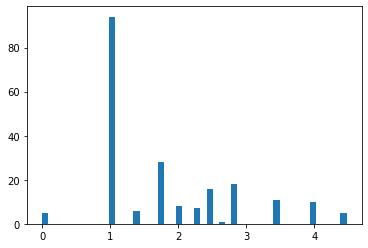

In [143]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()
data = data**0.5

In [144]:
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['CHMIN'] = data

In [145]:
print(dataset)

         MMIN     CHMAX      MMAX     CACH     CHMIN
0    0.251074  1.000000  0.420445  1.00000  0.894427
1    0.874463  0.676123  1.000000  0.46188  0.632456
2    0.874463  0.676123  1.000000  0.46188  0.632456
3    0.874463  0.676123  1.000000  0.46188  0.632456
4    0.874463  0.478091  0.717236  0.46188  0.632456
..        ...       ...       ...      ...       ...
204  0.497852  0.338062  0.492980  0.00000  0.223607
205  0.497852  0.338062  0.492980  0.46188  0.316228
206  0.623389  0.447214  0.492980  0.00000  0.316228
207  0.376611  0.000000  0.492980  0.46188  0.000000
208  0.497852  0.000000  0.334406  0.00000  0.000000

[209 rows x 5 columns]


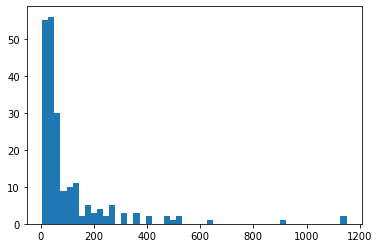

In [146]:
#Анализ столбца №8
data = row_dataset[8]

matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

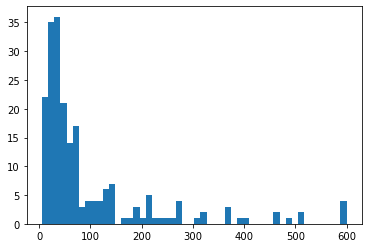

In [147]:
data = numpy.clip(data, 0, 600)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

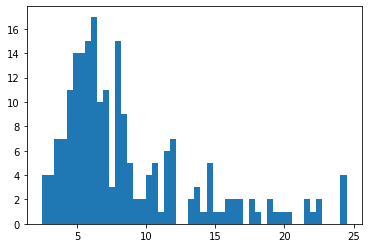

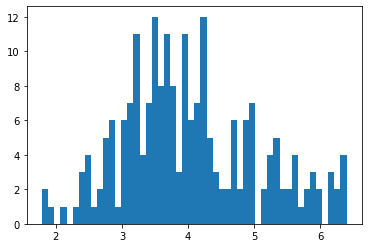

In [148]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()


matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

data = numpy.log(data)

In [149]:
data = numpy.array(data).reshape(-1,1)
data = StandardScaler().fit_transform(data)
data =  data.flatten()
dataset['PRP'] = data

In [150]:
print(dataset)

         MMIN     CHMAX      MMAX     CACH     CHMIN       PRP
0    0.251074  1.000000  0.420445  1.00000  0.894427  1.229905
1    0.874463  0.676123  1.000000  0.46188  0.632456  1.529143
2    0.874463  0.676123  1.000000  0.46188  0.632456  1.332788
3    0.874463  0.676123  1.000000  0.46188  0.632456  1.092443
4    0.874463  0.478091  0.717236  0.46188  0.632456  0.833975
..        ...       ...       ...      ...       ...       ...
204  0.497852  0.338062  0.492980  0.00000  0.223607 -0.284229
205  0.497852  0.338062  0.492980  0.46188  0.316228 -0.195397
206  0.623389  0.447214  0.492980  0.00000  0.316228 -0.075677
207  0.376611  0.000000  0.492980  0.46188  0.000000  0.171812
208  0.497852  0.000000  0.334406  0.00000  0.000000 -0.216859

[209 rows x 6 columns]


(array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       19, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 28, 29, 29], dtype=int32), Index(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'bur

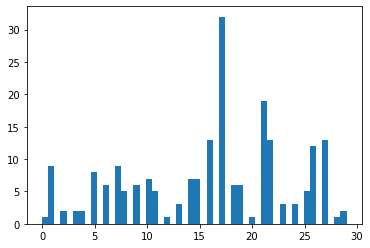

In [151]:
#Столбец №0
data = row_dataset[0]
data = pandas.factorize(data)# слова стали цифрами
print(data)
matplotlib.pyplot.hist(data[0], bins = 50)
matplotlib.pyplot.show()

In [152]:
data = data[0]
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['MYCT'] = data

         MMIN     CHMAX      MMAX     CACH     CHMIN       PRP      MYCT
0    0.251074  1.000000  0.420445  1.00000  0.894427  1.229905  0.000000
1    0.874463  0.676123  1.000000  0.46188  0.632456  1.529143  0.034483
2    0.874463  0.676123  1.000000  0.46188  0.632456  1.332788  0.034483
3    0.874463  0.676123  1.000000  0.46188  0.632456  1.092443  0.034483
4    0.874463  0.478091  0.717236  0.46188  0.632456  0.833975  0.034483
..        ...       ...       ...      ...       ...       ...       ...
204  0.497852  0.338062  0.492980  0.00000  0.223607 -0.284229  0.931034
205  0.497852  0.338062  0.492980  0.46188  0.316228 -0.195397  0.931034
206  0.623389  0.447214  0.492980  0.00000  0.316228 -0.075677  0.965517
207  0.376611  0.000000  0.492980  0.46188  0.000000  0.171812  1.000000
208  0.497852  0.000000  0.334406  0.00000  0.000000 -0.216859  1.000000

[209 rows x 7 columns]


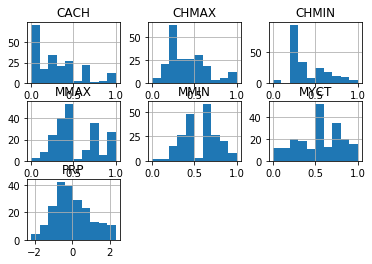

In [153]:
print(dataset)
dataset.hist()
matplotlib.pyplot.show()